In [1]:
from chase.base import *
from chase.utils import *
from chase.fit import *
from mypy.explib.frey2014 import frey2014
pd.set_option('display.max_colwidth', 100)

FIGDEST = '/Users/markant/Dropbox/sharelatex/ssDFE/ssDFEpsychrev_v0/figures/'

In [ ]:
arr = []
for sid in frey2014.subjects():
    print sid
    data = frey2014.subject_fitdata(sid)
    for d in data:
        arr.append([sid, d['gid'], d['group'], d['data'][0,0], d['data'][0,1]])
        
    df = pd.DataFrame(arr, columns=['subject', 'problem', 'group', 'choice', 'samplesize'])
df.to_csv('frey_data.csv')

In [2]:
df = frey2014.load_data()

In [35]:
df.to_csv('/Users/markant/Dropbox/SequentialSamplingDFE/frey_trial_data.csv')

In [2]:
data = pd.read_csv('data/frey_data.csv', index_col=0)
arr = []
for i, row in data.iterrows():
    arr.append(row['problem'].split('G')[0])
data['session'] = arr
data.head(10)

,subject,problem,group,choice,samplesize,session
0,1,S1G1,0,0,12,S1
1,1,S2G1,0,1,10,S2
2,1,S3G1,0,0,10,S3
3,1,S4G1,0,0,10,S4
4,1,S5G1,0,0,10,S5
5,1,S6G1,0,1,10,S6
6,1,S7G1,0,0,10,S7
7,1,S8G1,0,0,12,S8
8,1,S9G1,0,0,10,S9
9,1,S10G1,0,0,10,S10


In [3]:
import seaborn as sns

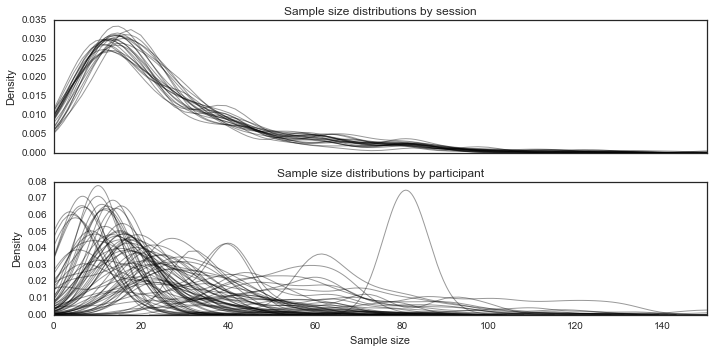

In [11]:
fig, axi = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
ax = axi[0]
for i, grp in data.groupby('session'):
    sns.kdeplot(grp.samplesize, bw=5, color='black', alpha=.4, ax=ax, linewidth=1)
ax.legend([])
ax.set_title('Sample size distributions by session')
ax.set_ylabel('Density')
ax.set_xlim(0, 150)

ax = axi[1]
for i, grp in data.groupby('subject'):
    sns.kdeplot(grp.samplesize, bw=5, color='black', alpha=.4, ax=ax, linewidth=1)
ax.legend([])
ax.set_title('Sample size distributions by participant')
ax.set_xlim(0, 150)
ax.set_xlabel('Sample size')
ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

fig.savefig(FIGDEST+'frey_session_vs_participant.pdf', bbox_inches='tight')

In [11]:
problems = {gid: frey2014.get_options(gid) for gid in data.problem.unique()}

In [87]:
switchfreq = frey2014.data.groupby('partid').apply(lambda x: np.mean((x['switchcount'])/x['samplesize']))
print switchfreq[30]

0.0627200491398


# Fit individual subjects

In [122]:
emp_p_switch = {}
for sid in frey2014.subjects():
    arr = []
    for a in frey2014.streak_lengths_by_subject(sid).values:
        for x in a:
            arr.append(x)
    emp_p_switch[sid] = np.round(1 / np.mean(arr), 3)

In [143]:
# a list of possible free parameters and their ranges
# and starting point (optional)
PARS = {'theta': [1, 10],
        'p_stay': [0, 1],
        'tau': [0, 40, 1.],
        'prelec_gamma': [0, 5],
        'prelec_elevation': [0, 5],
        'pow_gain': [0., np.inf, 1.],
        'w_loss': [0., np.inf, 1.]}

# parameters that are set to fixed values 
FIXED = {'delta': 0.5,}

N_ITER = 3
OUTDIR = 'chase_fitresults_frey2015'

# a list of different parameter combinations that will
# be fit
PARSETS = [#['theta', 'p_stay', 'tau'],
           ['theta', 'p_stay', 'tau', 'prelec_gamma'],
           #['theta', 'p_stay', 'tau', 'pow_gain'],
           ]

In [144]:
from chase.base import *
from chase.utils import *
from chase.fit import *

for sid in data.subject.unique()[2:]:

    SIM_ID = 'frey_individual_switching_subj=%s' % sid

    FIXED['p_switch'] = emp_p_switch[sid]

    for parset in PARSETS:

        fitting = {p: PARS[p] for p in parset}

        # initialize the model
        m = CHASEOptionalStoppingSwitchingModel(drift='cpt',
                                                startdist='softmax')

        # fit
        results = fit_mlh(m, problems, data[(data.subject==sid)], 
                          SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

frey_individual_switching_subj=3(p_stay,prelec_gamma,tau,theta|delta=0.5,p_switch=0.095)
0/30
theta: 1.0
iteration               0
success              True
nllh              392.796
k                       4
N                      84
bic              803.3152
theta                   1
p_stay          0.9471522
prelec_gamma      1.78482
tau             0.6317693
Name: 0, dtype: object
1/30
theta: 2.0
iteration              0
success             True
nllh            382.3669
k                      4
N                     84
bic             782.4571
theta                  2
p_stay          0.838548
prelec_gamma    1.480627
tau             3.584144
Name: 1, dtype: object
2/30
theta: 3.0
iteration               0
success              True
nllh             379.5203
k                       4
N                      84
bic              776.7638
theta                   3
p_stay          0.6780236
prelec_gamma    0.8190034
tau              2.471899
Name: 2, dtype: object
3/30
theta: 4.0
iteratio

KeyboardInterrupt: 